# 最重要的就是，搞清楚輸入和輸出的資料「張量大小」！！

# Categorical classification : MLP_softmax

x_input:  [ 0.15436674  0.47645302  0.27105943  0.96614757  0.94951019  0.26224347
  0.91972104  0.9449567   0.65897887  0.7404194   0.60454509  0.01212214
  0.35071167  0.7098817   0.88870394  0.98450599  0.76546275  0.17364117
  0.04270855  0.76866536]
y_input:  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (Non

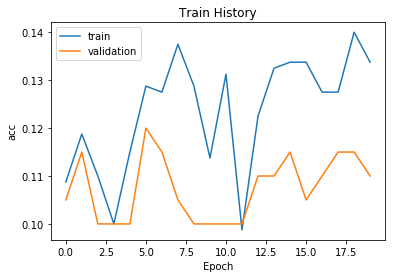

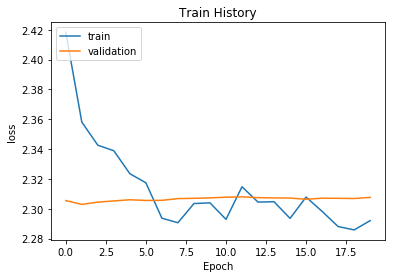

100/100 [==============================] - 0s
loss value and metric values:  [2.3112568855285645, 0.10000000149011612]


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))  #1000是樣本數，20是每個樣本給的data數目
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10) #0~9的onehot_encoding!!
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
print('x_input: ',x_train[0])
print('y_input: ',y_train[0])

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20)) #20是每個樣本給的data數目
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #0~9其中一種

print(model.summary())

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

train_history = model.fit(x_train, y_train,
                          validation_split=0.2, epochs=20,
                          batch_size=128)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#Returns the loss value & metrics values for the model in test mode.
score = model.evaluate(x_test, y_test, batch_size=128)
print('loss value and metric values: ',score)

# Binary classification : MLP_Sigmoid

x_train:  [ 0.05270228  0.98522199  0.87936801  0.04980769  0.21193208  0.97916698
  0.82697455  0.21697727  0.63408029  0.63420312  0.21962507  0.13730856
  0.35509203  0.2794283   0.66344815  0.78072532  0.4116488   0.80757854
  0.56365382  0.65262819]
y_train:  [0]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total

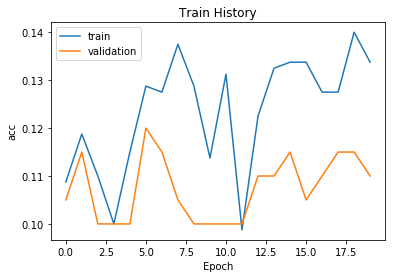

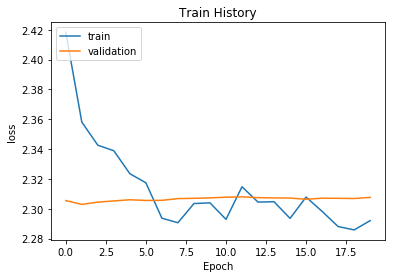

100/100 [==============================] - 0s
loss value and metric values:  [0.71020936965942383, 0.43999999761581421]


In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Generate dummy data
x_train = np.random.random((1000, 20)) #1000是樣本數，20是每個樣本給的data數目
y_train = np.random.randint(2, size=(1000, 1))  #隨機出現0或者1
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))
print('x_train: ', x_train[0])
print('y_train: ', y_train[0])


model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu')) #20是每個樣本給的data數目
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) #0或者1只是一個數字，unit=1

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=20, validation_split=0.2,
          batch_size=128)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

score = model.evaluate(x_test, y_test, batch_size=128)
print('loss value and metric values: ',score)

# 模擬圖片辨識 : CNN

x_train:  [[[ 0.56759911  0.61223541  0.9815033 ]
  [ 0.3060582   0.43715937  0.4903875 ]
  [ 0.95602745  0.14662574  0.70479685]
  ..., 
  [ 0.37218502  0.12841464  0.22113031]
  [ 0.90197868  0.27123919  0.79489816]
  [ 0.20001286  0.24795048  0.76429759]]

 [[ 0.62579666  0.45604307  0.37970801]
  [ 0.60050937  0.42028815  0.50842223]
  [ 0.08564684  0.59138955  0.64362942]
  ..., 
  [ 0.23650341  0.59261732  0.50978486]
  [ 0.52877407  0.37421434  0.09412064]
  [ 0.1505431   0.54958462  0.22316669]]

 [[ 0.35982168  0.97718784  0.69930455]
  [ 0.06531304  0.22183957  0.33708221]
  [ 0.95276251  0.86284253  0.44176164]
  ..., 
  [ 0.74881382  0.68186937  0.36368366]
  [ 0.05773012  0.86472514  0.91841632]
  [ 0.89071868  0.63444358  0.64690993]]

 ..., 
 [[ 0.40852154  0.60386916  0.13098775]
  [ 0.25731631  0.78350919  0.97417933]
  [ 0.41483907  0.17605627  0.33799765]
  ..., 
  [ 0.12388811  0.53379887  0.87868552]
  [ 0.63136146  0.25017318  0.2611539 ]
  [ 0.82478256  0.3910727

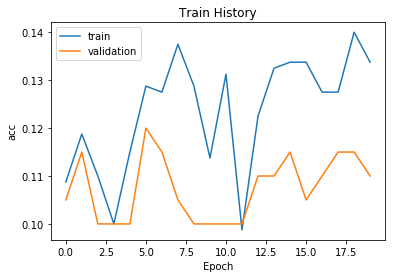

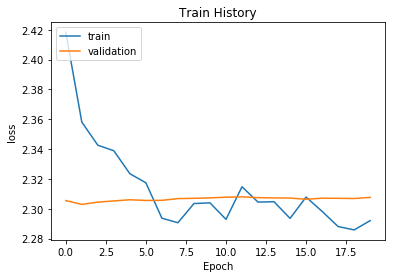

20/20 [==============================] - 0s
loss value and metric values:  2.34381914139


In [19]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3)) #100張 100x100像素 3=RGB圖片
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10) #一樣是區分0~9，10種圖片
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)
print('x_train: ', x_train[0])
print('y_train: ', y_train[0])


model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3))) #濾鏡3x3, input每張100x100像素 3=RGB圖片
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #每2x2取一個Max pool
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu')) #壓平做full connected layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #輸出成0~9其中一種辨識

print(model.summary())

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=10)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

score = model.evaluate(x_test, y_test, batch_size=32)
print('loss value and metric values: ',score)

# Binary classification: 使用單一LSTM分类

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         1280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 129       
Total params: 198,529
Trainable params: 198,529
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1000/1000 [==============================] - 3s - loss: 0.6966 - acc: 0.4890     
Epoch 2/10
1000/1000 [==============================] - 2s - loss: 0.6976 - acc: 0.4710     
Epoch 3/10
1000/1000 [==============================] - 2s - loss: 0.6950 - a

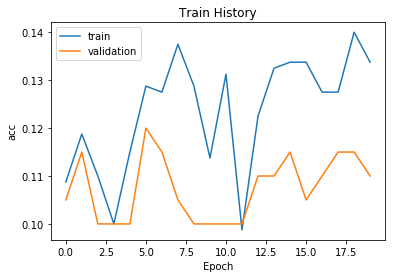

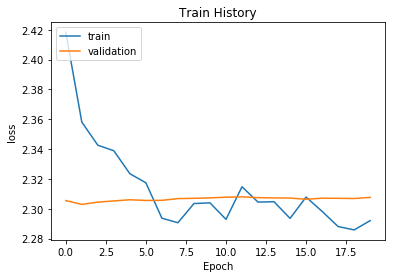

 96/100 [===========================>..] - ETA: 0s

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

x_train = np.random.random((1000, 5)) #1000筆樣本，每個樣本有5個數據
y_train = np.random.randint(2, size=(1000, 1)) #結果是0或者1
x_test = np.random.random((100, 5))
y_test = np.random.randint(2, size=(100, 1))

max_features = 5 #每個樣本最多5個數據

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) #結果是0或1，只有一個數字，unit=1

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

score = model.evaluate(x_test, y_test, batch_size=16)

# 使用1D卷积的序列分类

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_43 (Conv1D)           (None, 98, 64)            640       
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 96, 64)            12352     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 30, 128)           24704     
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 28, 128)           49280     
_________________________________________________________________
global_average_pooling1d_9 ( (None, 128)               0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 128)               0         
__________

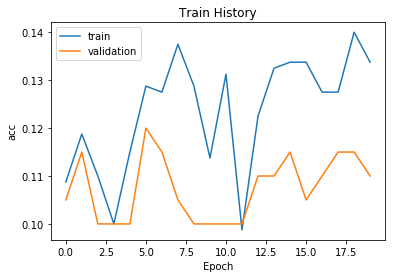

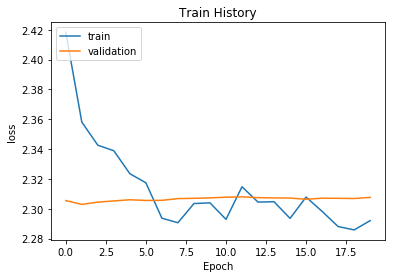

loss, metrics value [0.73739166259765621, 0.34999999999999998]


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Generate dummy data
x_train = np.random.random((100, 100, 3)) #100個 100的線 RGB 3色
y_train = np.random.randint(2, size=(100, 1)) #結果是0或1
x_test = np.random.random((20, 100, 3))
y_test = np.random.randint(2, size=(20, 1))
#print('x_train: ', x_train[0])
#print('y_train: ', y_train[0])

seq_length = 100 #100的線

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 3))) #濾鏡3, 每次input 100x3
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')
print('loss, metrics value: ', score)

# Categorical classification : 使用序列堆疊LSTM

x_train:  [[ 0.62810649  0.83478684  0.84560134  0.48636114  0.80098226  0.71553997
   0.66450713  0.97273382  0.2447071   0.93955557  0.87994217  0.75753857
   0.09432118  0.33331306  0.79409224  0.7199272 ]
 [ 0.31457061  0.43475444  0.1774193   0.34115023  0.13303406  0.1635668
   0.50688515  0.50900398  0.47240887  0.01845881  0.51900642  0.67847046
   0.06632371  0.96025827  0.03969561  0.90287311]
 [ 0.82327209  0.56626358  0.20776872  0.19987168  0.58491014  0.35343969
   0.07883197  0.48403815  0.99909956  0.74508758  0.03326783  0.80249382
   0.19417538  0.22175524  0.98057387  0.46841635]
 [ 0.15092804  0.95218988  0.76214109  0.14806168  0.03540505  0.81187816
   0.64951127  0.83659849  0.26751943  0.24237723  0.96858585  0.49235378
   0.91781825  0.76387527  0.88983136  0.15157549]
 [ 0.45279931  0.78131316  0.33738054  0.40801146  0.67050823  0.16927739
   0.88269853  0.8851252   0.76082821  0.56072289  0.37895035  0.53448342
   0.88010452  0.36387974  0.10571075  0.127008

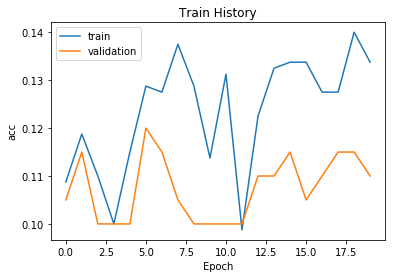

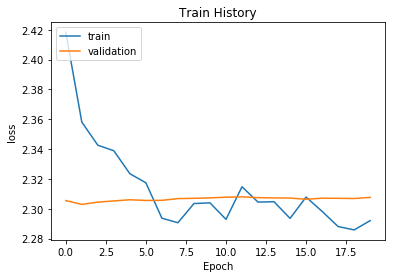

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
data_dim = 16 #每一個時間軸有多少筆數據
timesteps = 8  #一次取多少時間軸
num_classes = 10 #答案有幾種

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

print('x_train: ', x_train[0])
print('y_train: ', y_train[0])


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,  #要輸出的是一個向量，要用True。如果是數字，用False就可以了。
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax')) #答案有幾種

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

# 采用stateful LSTM的相同模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (32, 8, 32)               6272      
_________________________________________________________________
lstm_13 (LSTM)               (32, 8, 32)               8320      
_________________________________________________________________
lstm_14 (LSTM)               (32, 32)                  8320      
_________________________________________________________________
dense_60 (Dense)             (32, 10)                  330       
Total params: 23,242
Trainable params: 23,242
Non-trainable params: 0
_________________________________________________________________
None
Train on 320 samples, validate on 96 samples
Epoch 1/5
320/320 [==============================] - 3s - loss: 11.6139 - acc: 0.1094 - val_loss: 11.5407 - val_acc: 0.0938
Epoch 2/5
320/320 [==============================] - 1s - loss: 11.6079 - acc: 0.1313 - val_loss

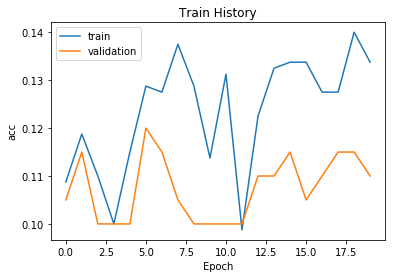

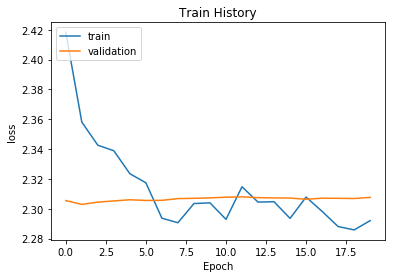

In [47]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
data_dim = 16 #每個時間軸有幾筆數據
timesteps = 8 #一次取幾個時間軸
num_classes = 10 #答案有幾種
batch_size = 32 

# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))


# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True, #stateful=True
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True)) #stateful=True
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax')) #答案有幾種

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False, #關閉shuffle
          validation_data=(x_val, y_val))

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

# 繪製Keras流程圖

import keras<br/>
from keras.utils.vis_utils import plot_model<br/>
plot_model(model, to_file='Keras_Flow/trial.png', show_shapes=True)

x_train:  [[  4.13829342e-01   1.78685155e-03   1.66981944e-01   3.21490299e-01
    2.68628340e-02   8.43800345e-02   4.89042464e-01   5.55817022e-01
    3.22260848e-01   4.18187834e-01   7.20496211e-01   5.27203150e-01
    1.62892484e-01   4.29016794e-01   6.92395062e-01   1.76232639e-01]
 [  8.56347422e-01   7.25216591e-01   3.51379384e-01   2.63538406e-01
    7.27976643e-02   6.62292934e-01   6.98541759e-01   6.88568924e-01
    2.77606830e-01   4.73008069e-01   4.81542824e-01   2.29158472e-01
    6.35862981e-01   1.73935764e-01   4.19230862e-01   4.50776816e-01]
 [  2.06116889e-01   2.75961669e-01   3.07249856e-02   7.74792778e-01
    6.87547702e-01   2.64868802e-01   6.48044793e-01   5.38721405e-01
    4.20444728e-03   1.17778327e-01   6.09474556e-01   4.75065881e-01
    2.52210503e-01   7.40829379e-01   4.69929123e-01   6.58441758e-01]
 [  8.52191951e-01   4.97060306e-01   7.23284010e-01   7.11890795e-01
    2.30762543e-01   6.54756942e-02   9.60164879e-01   8.72740906e-01
    5.5

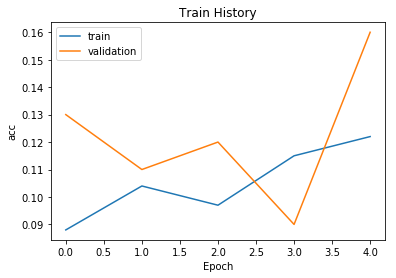

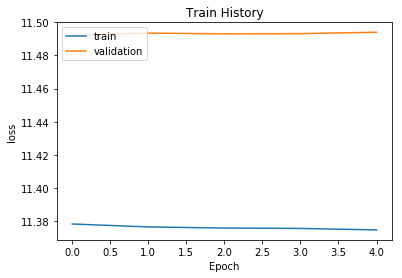

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
data_dim = 16 #每一個時間軸有多少筆數據
timesteps = 8  #一次取多少時間軸
num_classes = 10 #答案有幾種

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

print('x_train: ', x_train[0])
print('y_train: ', y_train[0])


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,  #要輸出的是一個向量，要用True。如果是數字，用False就可以了。
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax')) #答案有幾種

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_history = model.fit(x_train, y_train,
                          batch_size=64, epochs=5,
                          validation_data=(x_val, y_val))

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

import keras
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Keras_Flow/trial.png', show_shapes=True)